In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [2]:
file_path = 'modified_dataset/us_project_normalize.csv'

us_ds = pd.read_csv(file_path, sep=',')

In [3]:
feature_names = us_ds.columns

# display the min max value of each feature
for feature in feature_names:
    print(f"{feature}: min={us_ds[feature].min()}, max={us_ds[feature].max()}")

intercept: min=1.0, max=1.0
period_begin: min=2012-01-01, max=2024-08-01
period_end: min=2012-01-31, max=2024-08-31
period_duration: min=30, max=30
region_type: min=place, max=place
region_type_id: min=6, max=6
table_id: min=3, max=38773
is_seasonally_adjusted: min=f, max=f
region: min=Abbeville, LA, max=Zumbrota, MN
city: min=Abbeville, max=Zumbrota
state: min=Alabama, max=Wisconsin
state_code: min=AK, max=WV
property_type: min=All Residential, max=Townhouse
property_type_id: min=-1, max=13
median_sale_price: min=-1.20623697710122, max=58.97284302712385
median_sale_price_mom: min=-2.5837508924190398, max=359.0133757718985
median_sale_price_yoy: min=-0.0225400241754505, max=845.8914535955769
median_list_price: min=-0.7118153638236072, max=883.6097710504298
median_list_price_mom: min=-1.2889797186828018, max=992.3473612996106
median_list_price_yoy: min=-0.9116308610285128, max=747.4316731372296
median_ppsf: min=-0.2183437270383181, max=482.0154571700948
median_ppsf_mom: min=-0.495797538

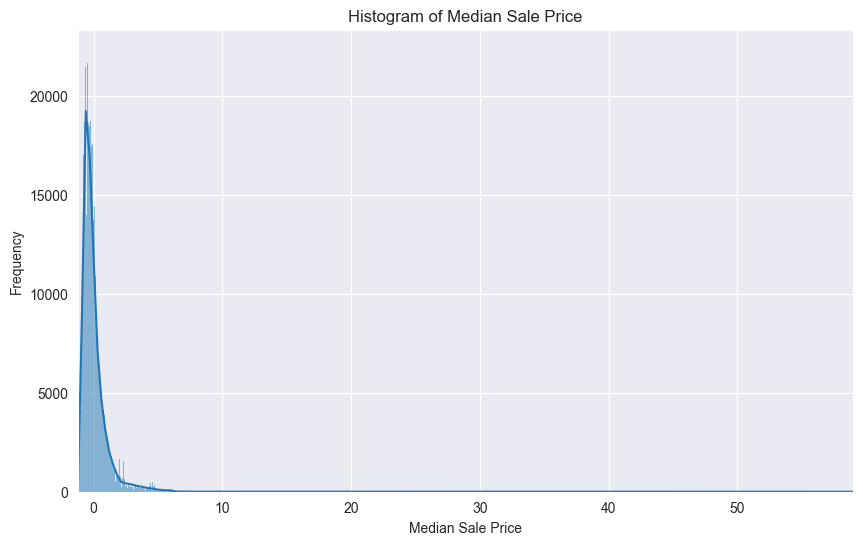

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(us_ds['median_sale_price'], kde=True)
plt.title('Histogram of Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Frequency')
plt.xlim(us_ds['median_sale_price'].min(), us_ds['median_sale_price'].max())
# plt.xlim(-1.5,3)
plt.show()

In [5]:
test = pd.Series(us_ds['median_sale_price'])
min_value = test.min()
max_value = test.max()
normalized_values = (test - min_value) / (max_value - min_value)
us_ds_copy = us_ds.copy()
us_ds_copy.loc[:,'normalized_median_sale_price'] = normalized_values

pd.Series(us_ds_copy['normalized_median_sale_price'].unique())

us_ds_copy.shape

(1789212, 74)

In [6]:
us_ds_copy

intercept period_begin  period_end  period_duration region_type  \
0              1.0   2017-09-01  2017-09-30               30       place   
1              1.0   2020-07-01  2020-07-31               30       place   
2              1.0   2021-08-01  2021-08-31               30       place   
3              1.0   2018-08-01  2018-08-31               30       place   
4              1.0   2023-01-01  2023-01-31               30       place   
...            ...          ...         ...              ...         ...   
1789207        1.0   2014-03-01  2014-03-31               30       place   
1789208        1.0   2024-06-01  2024-06-30               30       place   
1789209        1.0   2016-11-01  2016-11-30               30       place   
1789210        1.0   2019-12-01  2019-12-31               30       place   
1789211        1.0   2019-08-01  2019-08-31               30       place   

         region_type_id  table_id is_seasonally_adjusted          region  \
0                     6     29470                      f     Chicago, IL   
1                     6     37598                      f  Parsippany, NJ   
2                     6     24993                      f    Oakbrook, KY   
3                     6     29754                      f   Dunstable, MA   
4                     6     10728                      f   Kalamazoo, MI   
...                 ...       ...                    ...             ...   
1789207               6      7158                      f   Fullerton, CA   
1789208               6     31296                      f    Roebling, NJ   
1789209               6       245                      f      Albany, NY   
1789210               6     10832                      f     Liberty, TX   
1789211               6     26146                      f      Storrs, CT   

               city  ... price_increased_yoy inventory_turnover  \
0           Chicago  ...                   1          -0.659877   
1        Parsippany  ...                   0           0.591989   
2          Oakbrook  ...                   1           3.177449   
3         Dunstable  ...                   0          -0.183649   
4         Kalamazoo  ...                   1          -0.142691   
...             ...  ...                 ...                ...   
1789207   Fullerton  ...                   0          -0.571468   
1789208    Roebling  ...                   0           0.074897   
1789209      Albany  ...                   0          -0.445167   
1789210     Liberty  ...                   0          -0.093720   
1789211      Storrs  ...                   1          -0.669402   

        sale_to_list_ppsf_ratio  supply_demand_balance  fast_selling  \
0                     -0.223963               3.247222             0   
1                     -0.005179               0.179183             0   
2                     -0.029312               0.179183             1   
3                      0.082212               0.002180             0   
4                      0.004767              -0.469826             1   
...                         ...                    ...           ...   
1789207               -0.050774               0.120182             0   
1789208               -0.201923               0.002180             1   
1789209               -0.269634              -0.587827             0   
1789210               -0.157056              -0.115821             0   
1789211               -0.056139               0.061181             0   

         sin_year  cos_year  sin_month  cos_month  \
0        0.573151  1.273751  -1.345297   0.094627   
1        1.103099 -0.638699  -0.637291  -1.137098   
2        0.573151 -1.151138  -1.155588  -0.616510   
3        1.103099  0.761311  -1.155588  -0.616510   
4       -0.874693 -1.151138   0.778721   1.326353   
...           ...       ...        ...        ...   
1789207 -1.404641  0.761311   1.486727   0.094627   
1789208 -1.404641 -0.638699   0.070715  -1.327647   
1789209 -0.150771  1.461316  -0.6372

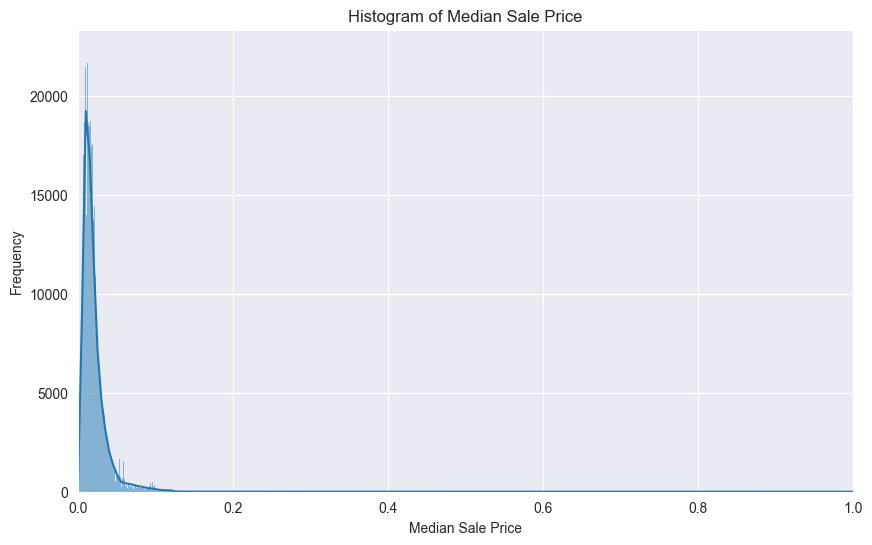

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(us_ds_copy['normalized_median_sale_price'], kde=True)
plt.title('Histogram of Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Frequency')
plt.xlim(us_ds_copy['normalized_median_sale_price'].min(), us_ds_copy['normalized_median_sale_price'].max())
plt.show()

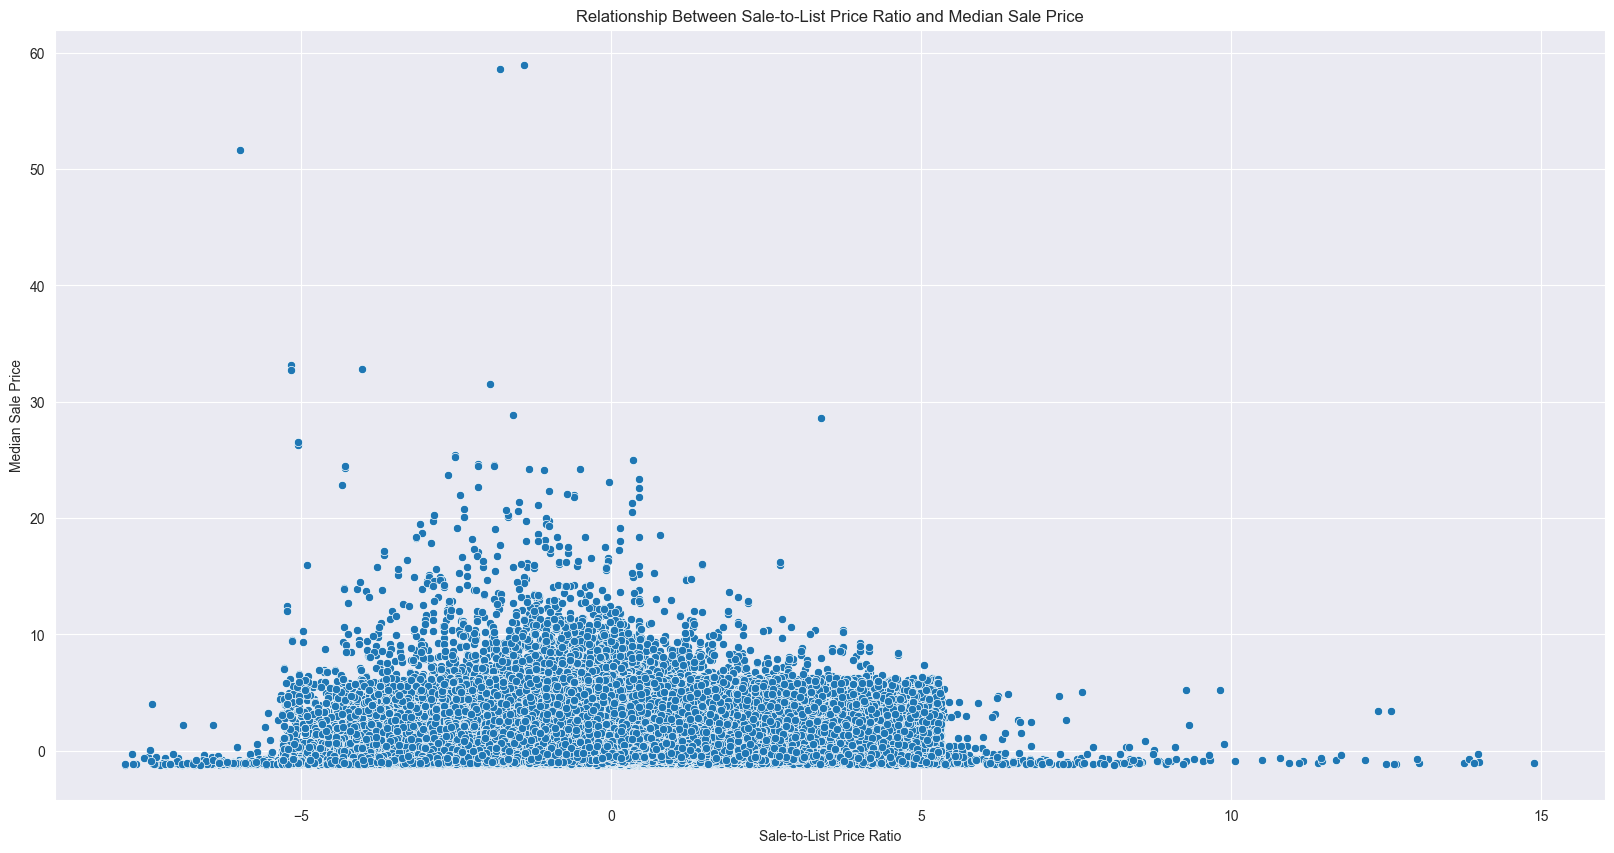

In [8]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=us_ds_copy, x='avg_sale_to_list', y='median_sale_price')
plt.title('Relationship Between Sale-to-List Price Ratio and Median Sale Price')
plt.xlabel('Sale-to-List Price Ratio')
plt.ylabel('Median Sale Price')
plt.show()

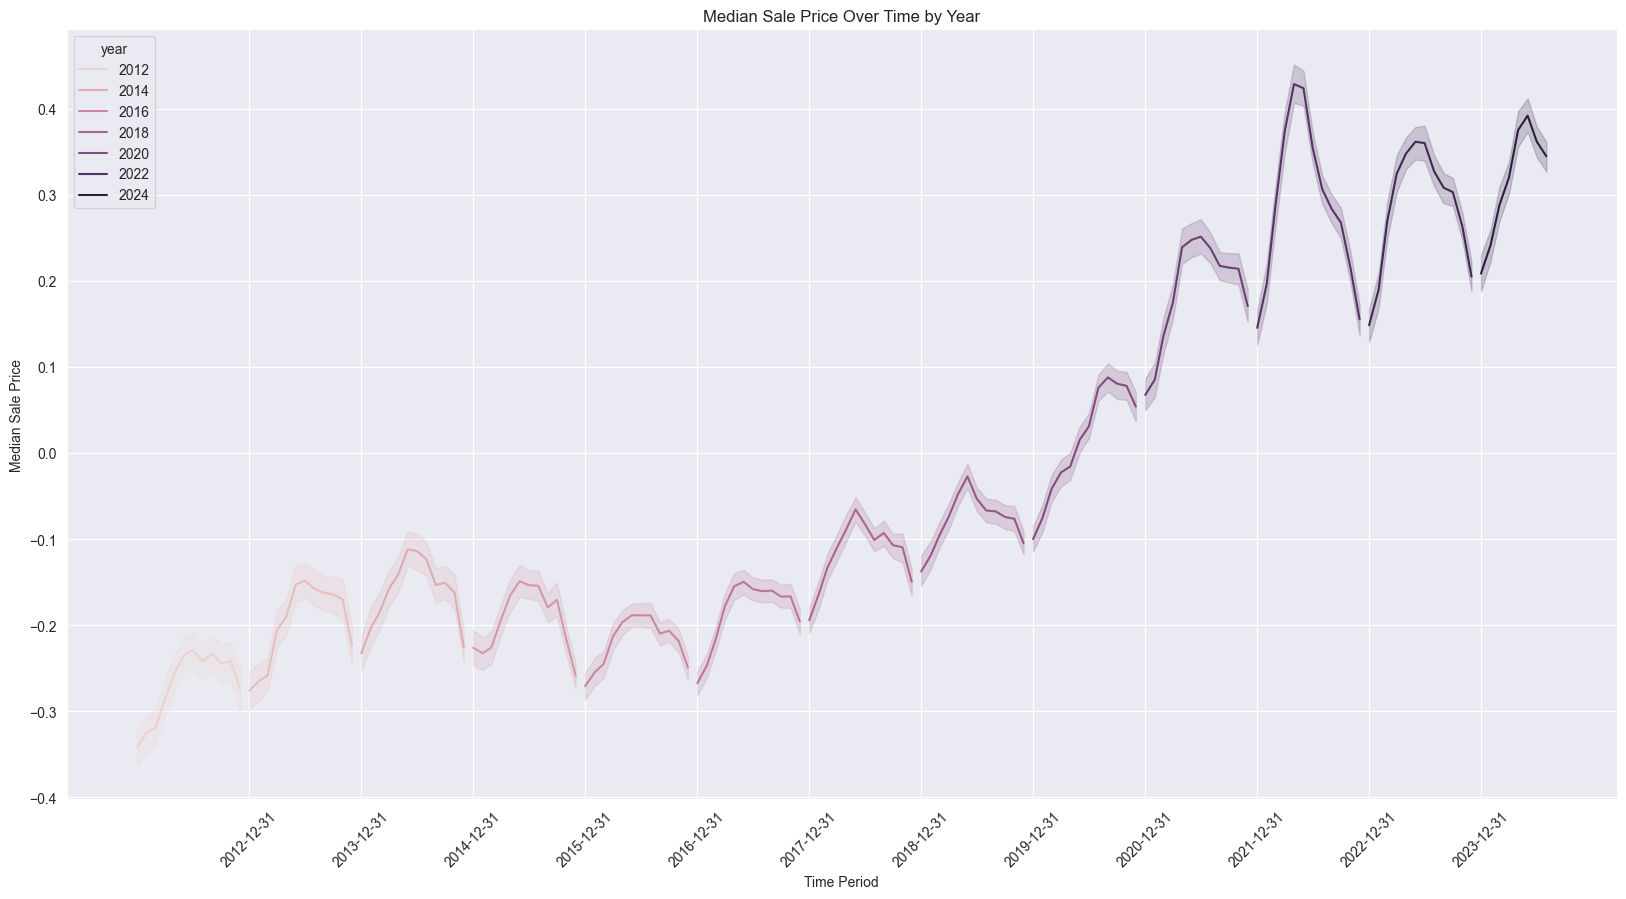

In [9]:
us_ds_copy['period_begin'] = pd.to_datetime(us_ds_copy['period_begin'])
us_ds_copy_sorted = us_ds_copy.sort_values(by='period_begin')

plt.figure(figsize=(20, 10))
sns.lineplot(x=us_ds_copy['period_begin'], y=us_ds_copy['median_sale_price'], hue=us_ds_copy['year'])
plt.title('Median Sale Price Over Time by Year')
plt.xlabel('Time Period')
plt.ylabel('Median Sale Price')

# Set x-axis to display each year
plt.xticks(
    pd.date_range(start=us_ds_copy_sorted['period_begin'].min(), 
                  end=us_ds_copy_sorted['period_begin'].max(), 
                  freq='YE'),  # 'Y' means Year frequency
    rotation=45
)

plt.show()

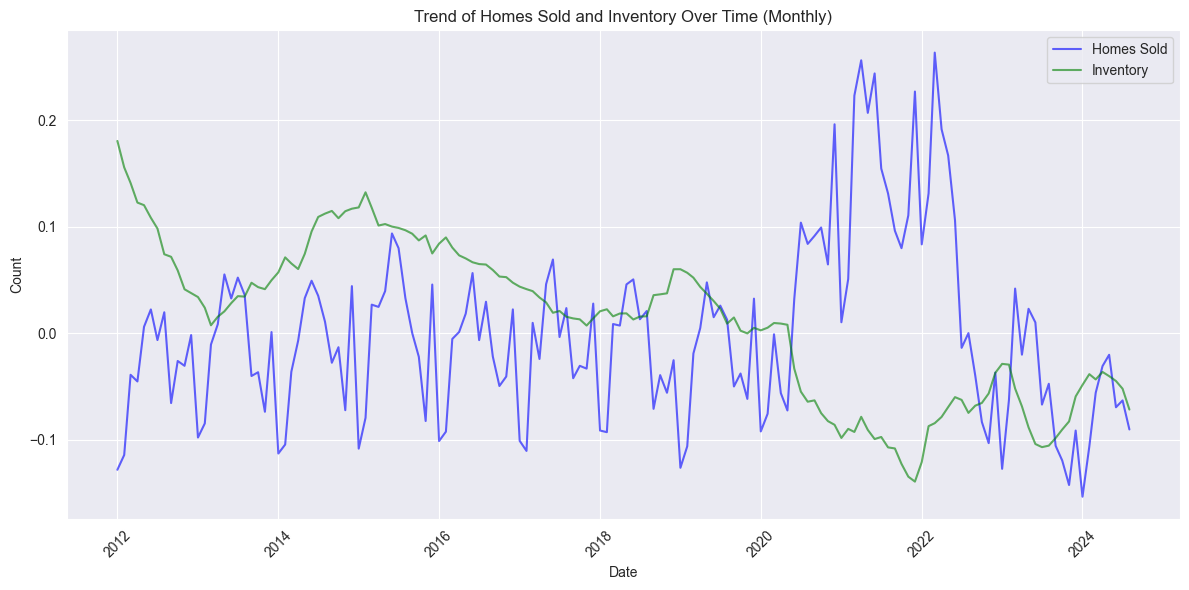

In [10]:
us_ds_copy['period_begin'] = pd.to_datetime(us_ds_copy['period_begin'])

us_ds_copy['year'] = us_ds_copy['period_begin'].dt.year
us_ds_copy['month'] = us_ds_copy['period_begin'].dt.month
monthly_data = us_ds_copy.groupby(['year', 'month']).agg({
    'homes_sold': 'mean',
    'inventory': 'mean'
}).reset_index()

monthly_data['period'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['period'], monthly_data['homes_sold'], label='Homes Sold', color='blue', alpha=0.6)
plt.plot(monthly_data['period'], monthly_data['inventory'], label='Inventory', color='green', alpha=0.6)
plt.title('Trend of Homes Sold and Inventory Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

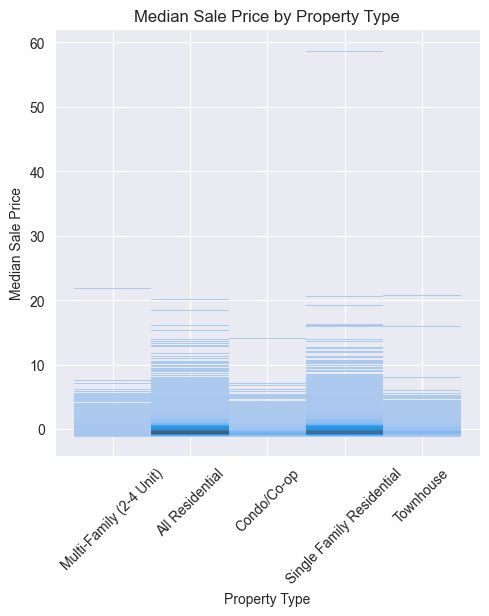

In [11]:
plt.figure(figsize=(10, 6))
sns.displot(data=us_ds_copy, x='property_type', y='median_sale_price')
plt.title('Median Sale Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)
plt.show()

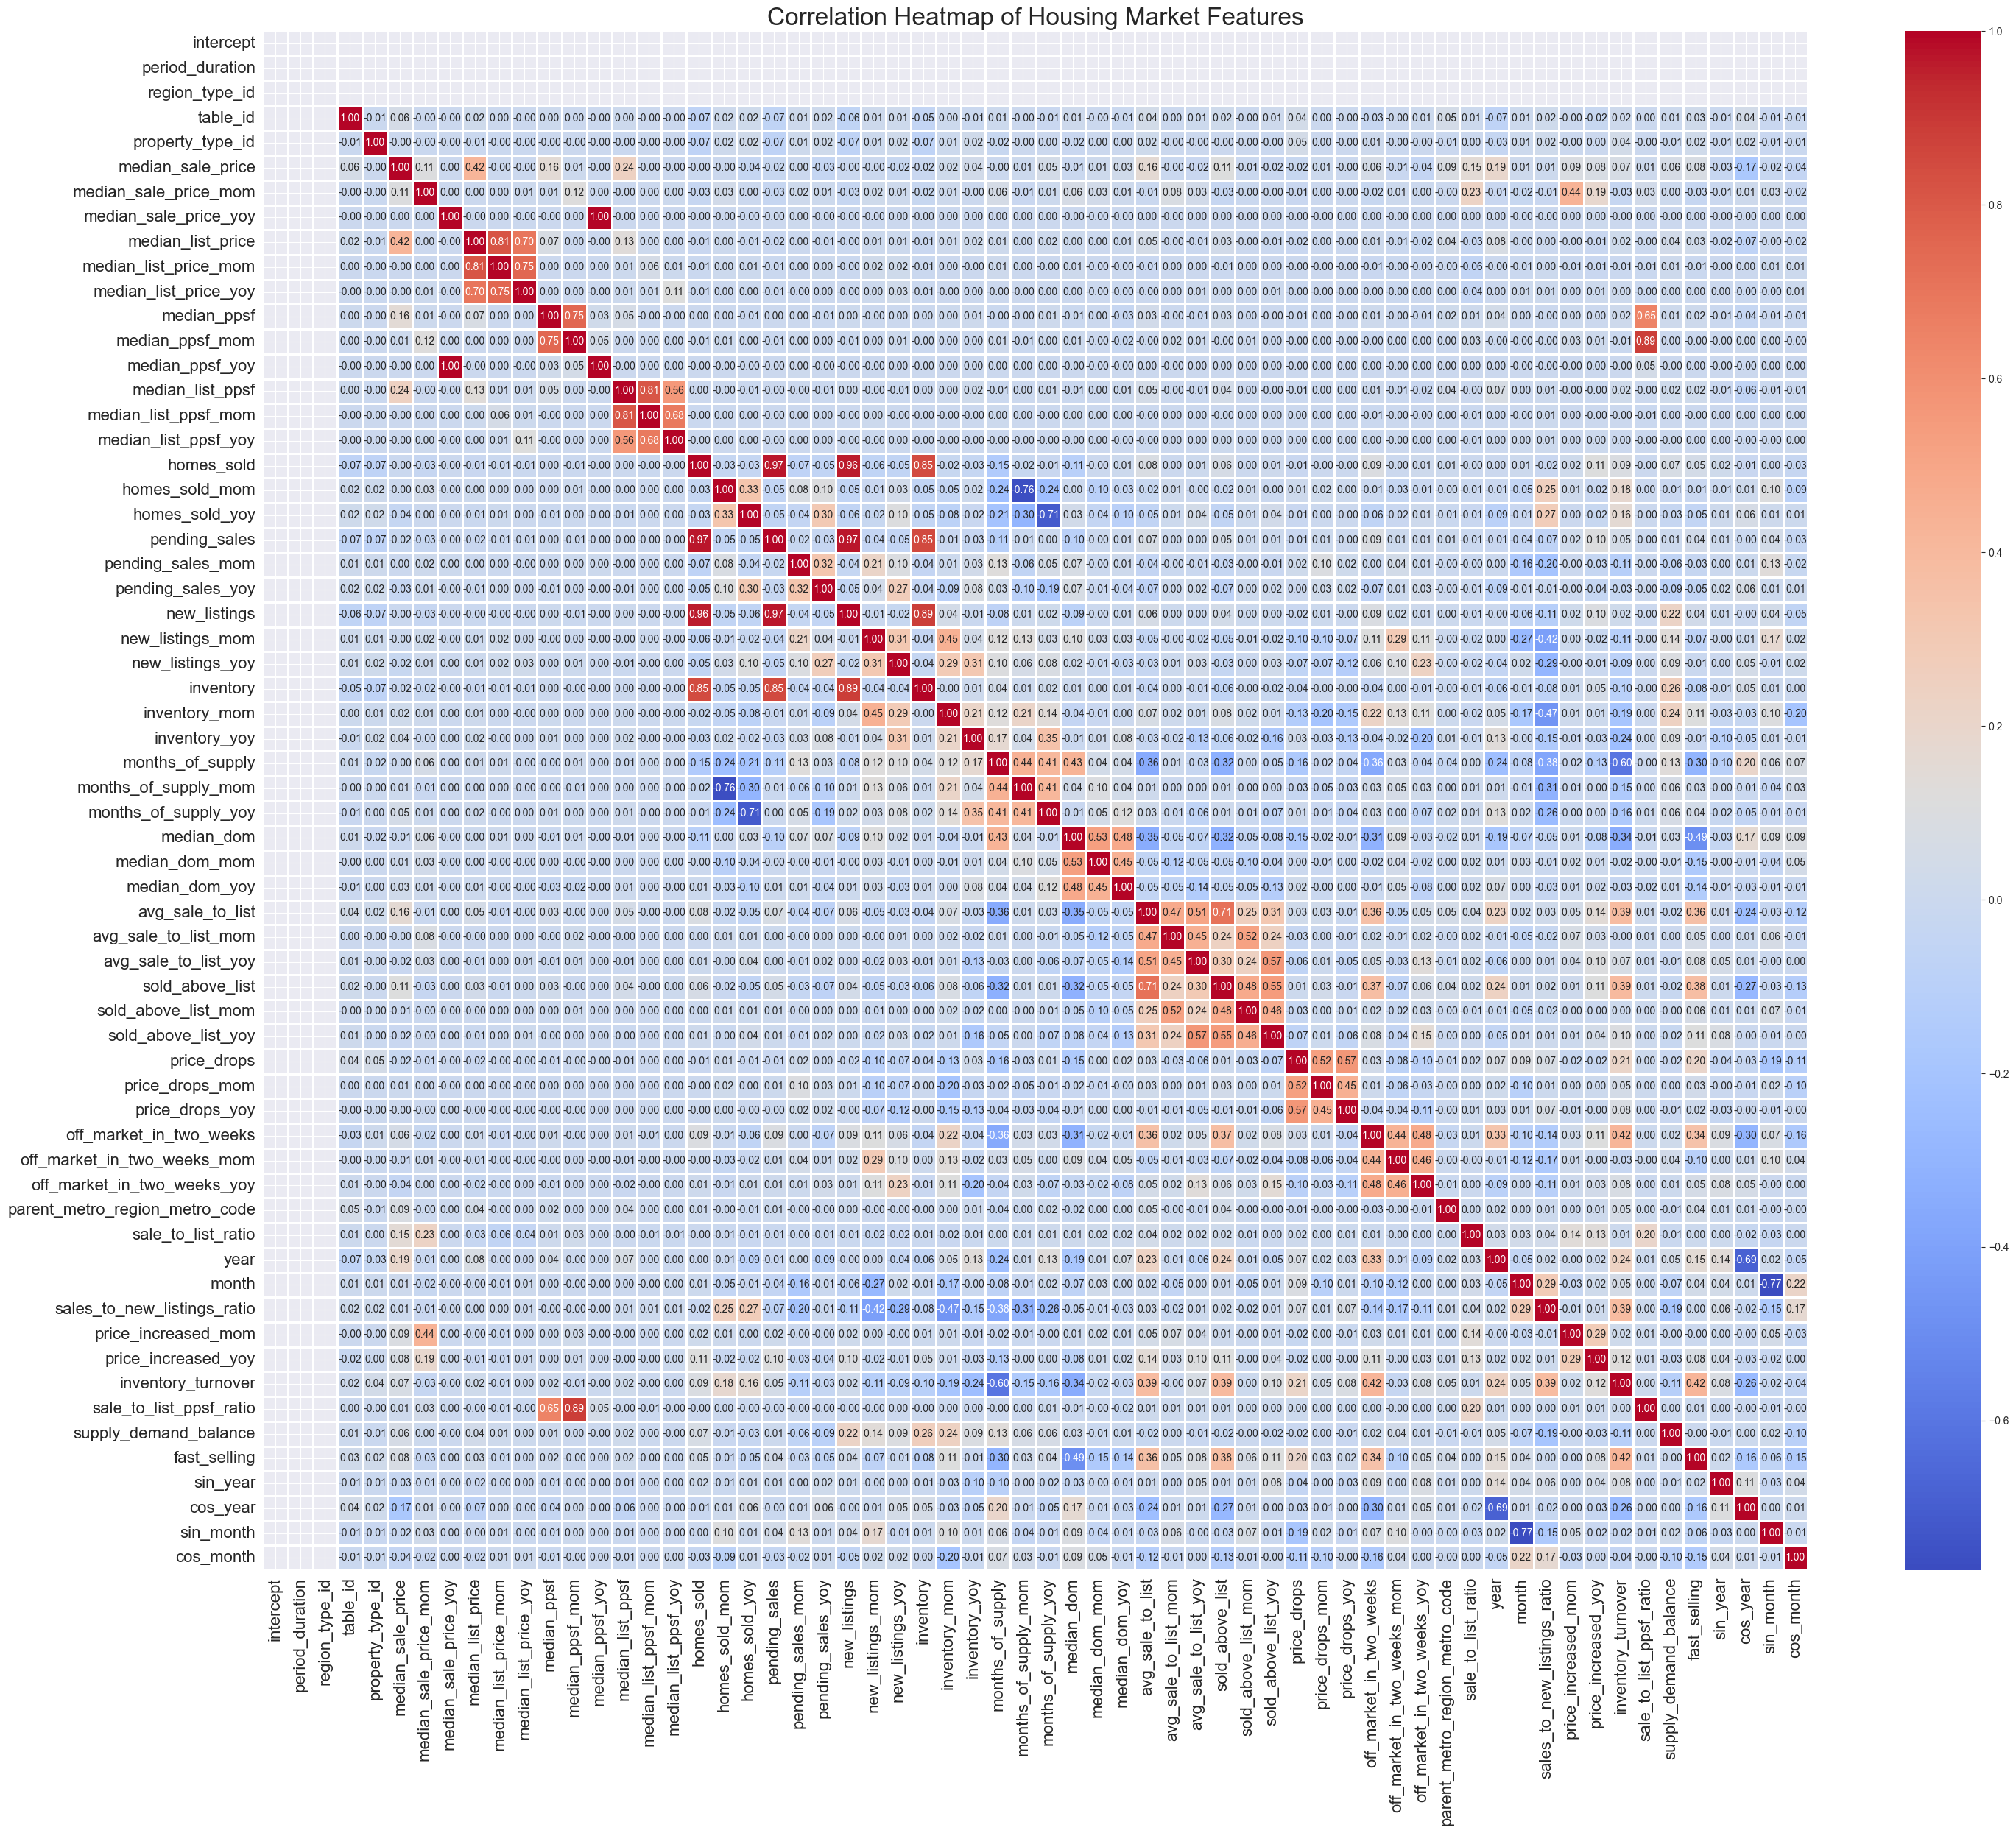

In [12]:
us_ds_copy['period_begin'] = pd.to_datetime(us_ds_copy['period_begin'])
us_ds_copy['period_end'] = pd.to_datetime(us_ds_copy['period_end'])
numeric_columns = us_ds.select_dtypes(include=['number']).columns

plt.figure(figsize=(30, 25))
sns.heatmap(us_ds_copy[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap of Housing Market Features', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

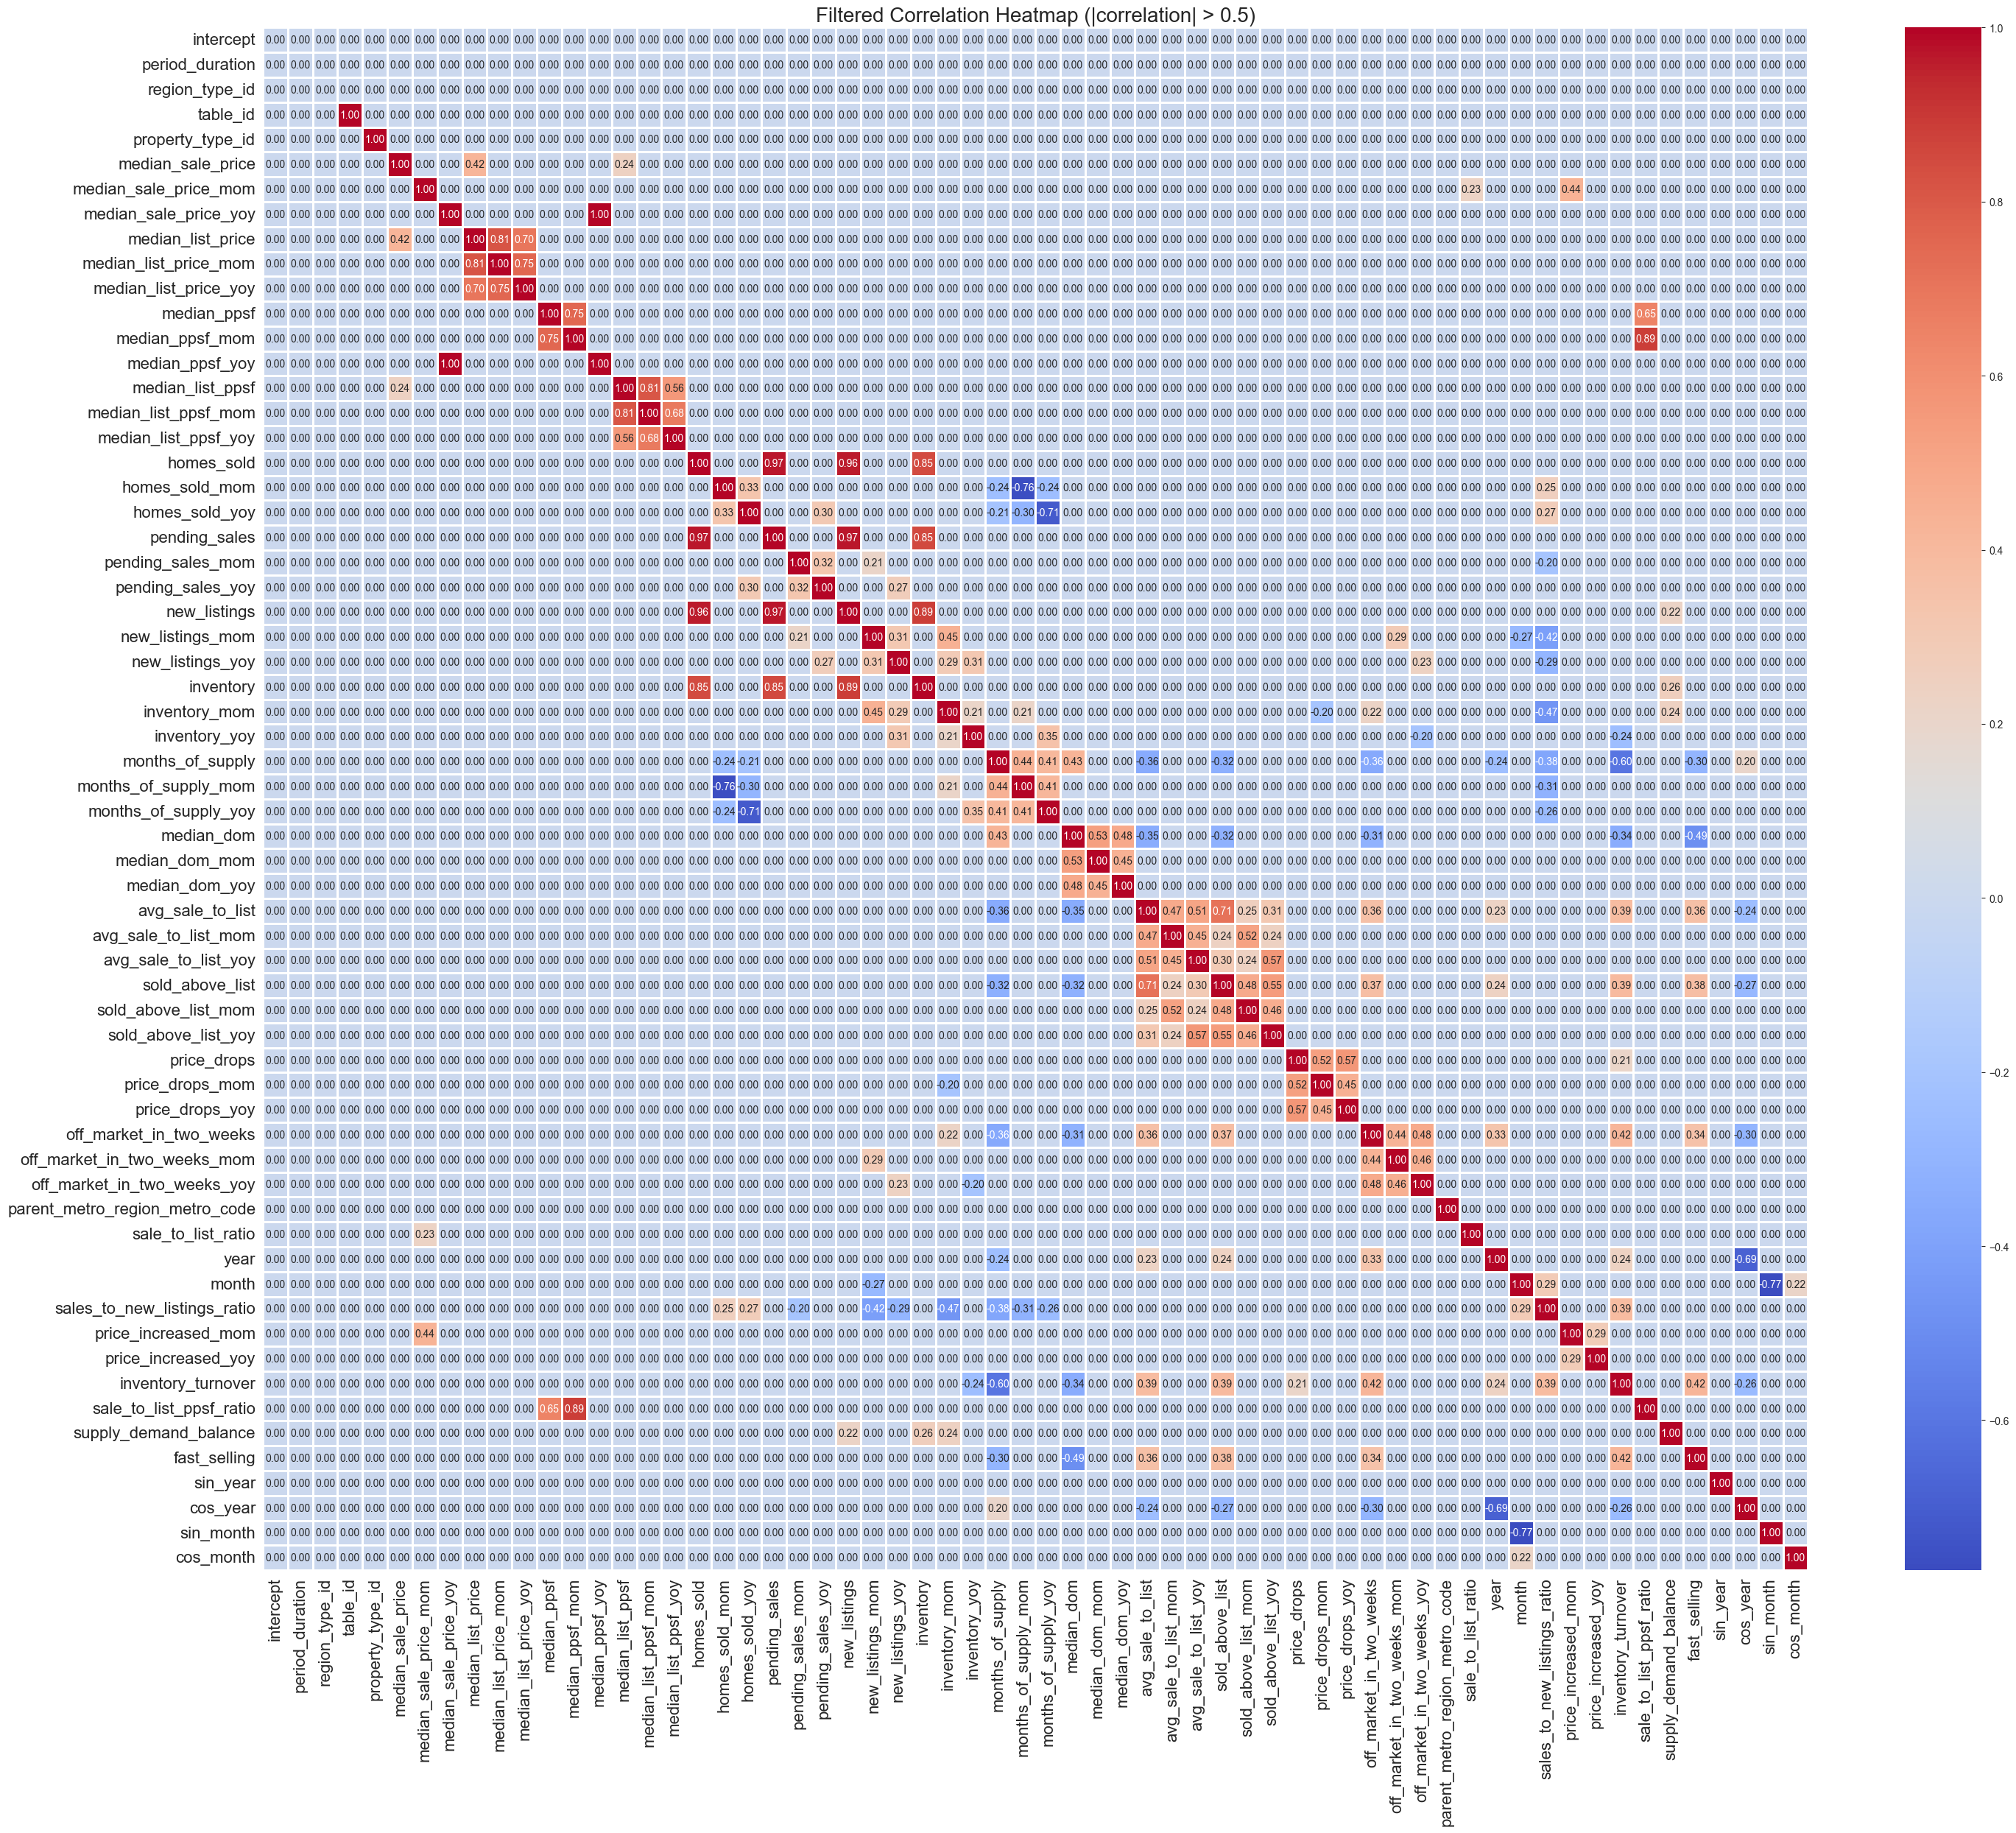

In [13]:
correlation_matrix = us_ds_copy[numeric_columns].corr()
strong_corr = correlation_matrix[abs(correlation_matrix) >= 0.2].fillna(0)

plt.figure(figsize=(30, 25))
sns.heatmap(strong_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Filtered Correlation Heatmap (|correlation| > 0.5)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
relevant_columns_1 = [
    'median_sale_price', 'homes_sold', 'inventory','pending_sales', 
    'new_listings', 'months_of_supply', 
    'sale_to_list_ratio', 'inventory_turnover', 
]
us_ds_relevant_1 = us_ds_copy[relevant_columns_1]

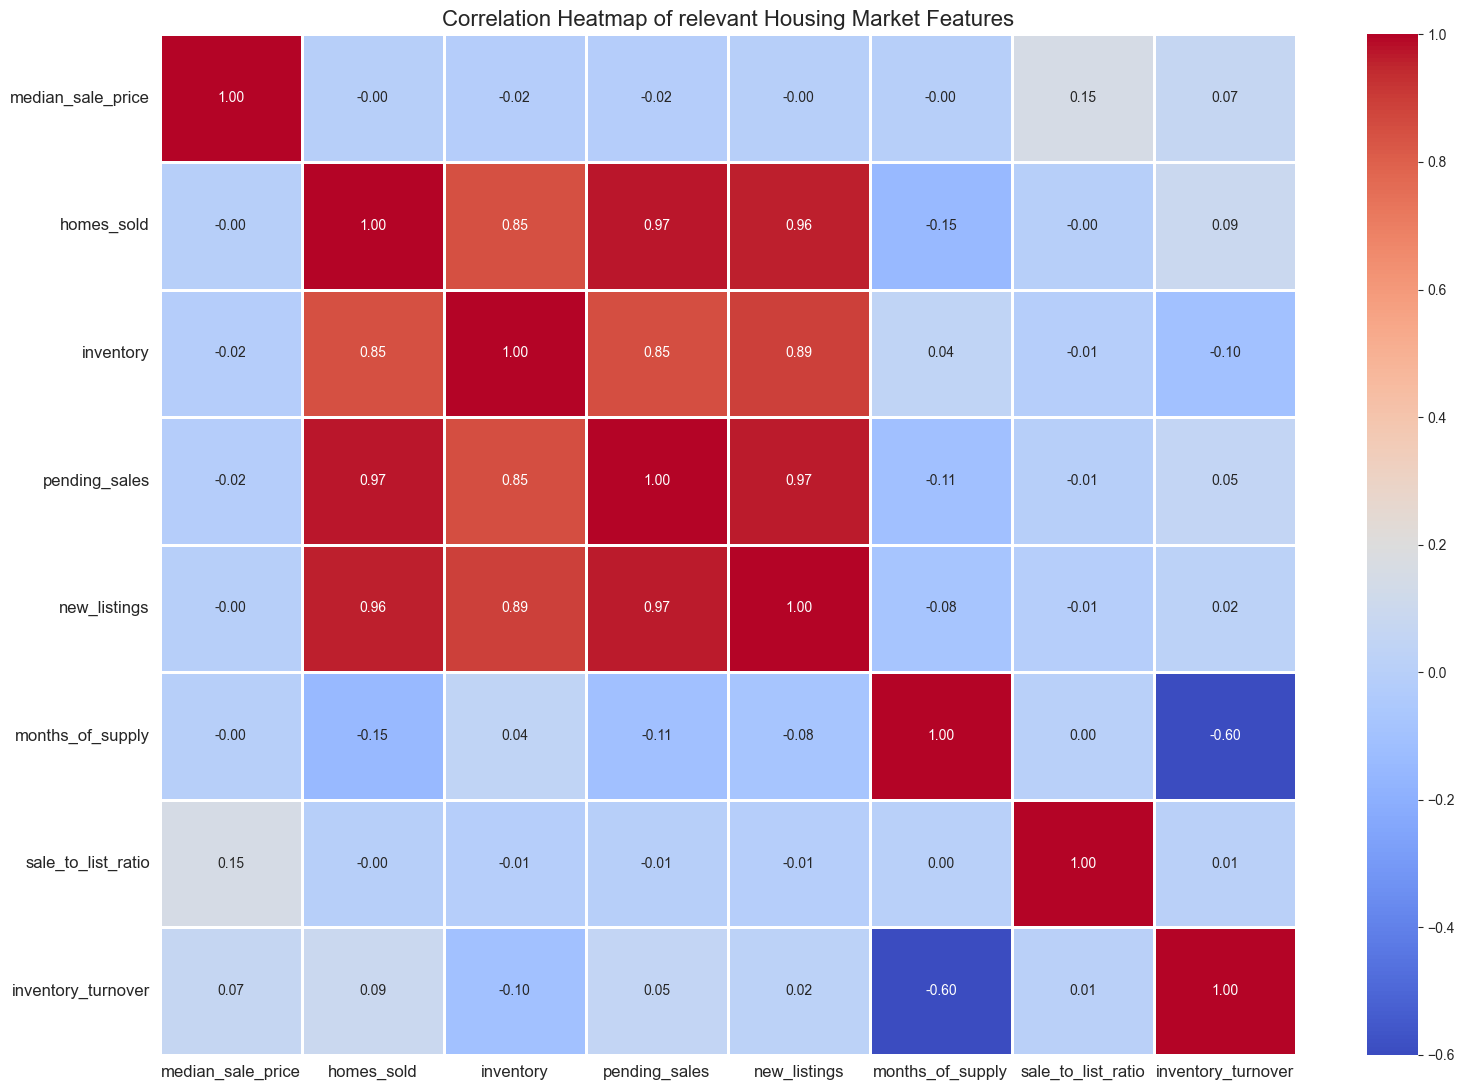

In [15]:
plt.figure(figsize=(16, 11))
sns.heatmap(us_ds_relevant_1.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap of relevant Housing Market Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
us_ds_copy.columns

Index(['intercept', 'period_begin', 'period_end', 'period_duration',
       'region_type', 'region_type_id', 'table_id', 'is_seasonally_adjusted',
       'region', 'city', 'state', 'state_code', 'property_type',
       'property_type_id', 'median_sale_price', 'median_sale_price_mom',
       'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom',
       'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom',
       'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom',
       'median_list_ppsf_yoy', 'homes_sold', 'homes_sold_mom',
       'homes_sold_yoy', 'pending_sales', 'pending_sales_mom',
       'pending_sales_yoy', 'new_listings', 'new_listings_mom',
       'new_listings_yoy', 'inventory', 'inventory_mom', 'inventory_yoy',
       'months_of_supply', 'months_of_supply_mom', 'months_of_supply_yoy',
       'median_dom', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list',
       'avg_sale_to_list_mom', 'avg_sale_to_list_yoy', 'sold_above_list',
       'sol

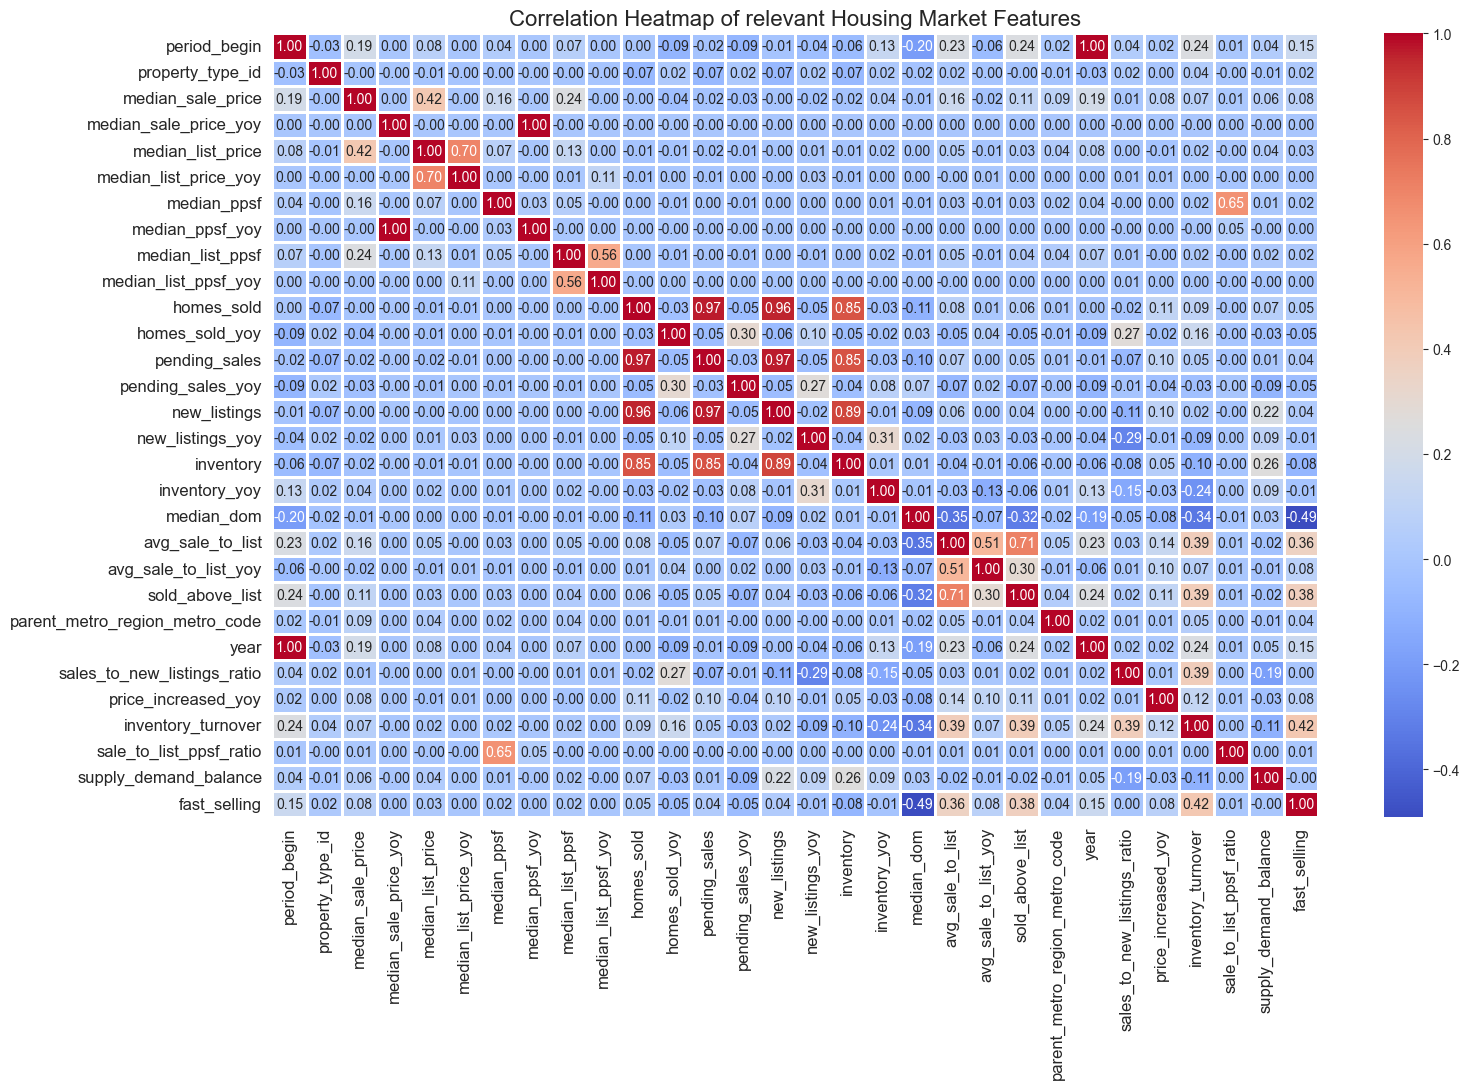

In [17]:
relevant_columns_2 = [
    'period_begin', 'property_type_id', 'median_sale_price', 'median_sale_price_yoy',
    'median_list_price', 'median_list_price_yoy', 'median_ppsf', 'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_yoy',
    'homes_sold', 'homes_sold_yoy', 'pending_sales', 'pending_sales_yoy', 'new_listings', 'new_listings_yoy', 'inventory', 
    'inventory_yoy', 'median_dom', 'avg_sale_to_list', 'avg_sale_to_list_yoy', 'sold_above_list', 'parent_metro_region_metro_code',
    'year', 'sales_to_new_listings_ratio', 'price_increased_yoy', 'inventory_turnover', 'sale_to_list_ppsf_ratio',
    'supply_demand_balance', 'fast_selling',
]
us_ds_relevant_2 = us_ds_copy[relevant_columns_2]

plt.figure(figsize=(16, 11))
sns.heatmap(us_ds_relevant_2.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap of relevant Housing Market Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()